In [89]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as mtlot
import seaborn as sns


In [90]:
df = pd.read_csv('video_games_sales.csv')

In [91]:
df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [92]:
df.shape


(16598, 11)

In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [94]:
df.drop('rank', axis=1, inplace=True)

In [95]:
pd.isnull(df)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False


In [96]:
pd.isnull(df).sum()


name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [99]:
df['year']=df['year'].astype(int)
df['year'].dtype

dtype('int64')

In [100]:
def map_to_decade(year):
    if 1980 <= year <= 1989:
        return '1980-1989'
    elif 1990 <= year <= 1999:
        return '1990-1999'
    elif 2000 <= year <= 2009:
        return '2000-2009'
    elif 2010 <= year <= 2019:
        return '2010-2019'

df['decade'] = df['year'].apply(map_to_decade)

In [101]:
df.head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000-2009
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980-1989
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000-2009
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000-2009
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990-1999
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980-1989
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000-2009
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000-2009
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000-2009
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980-1989


In [102]:
df.describe()


,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [103]:
sns.set(rc={'figure.figsize':(20,5)})

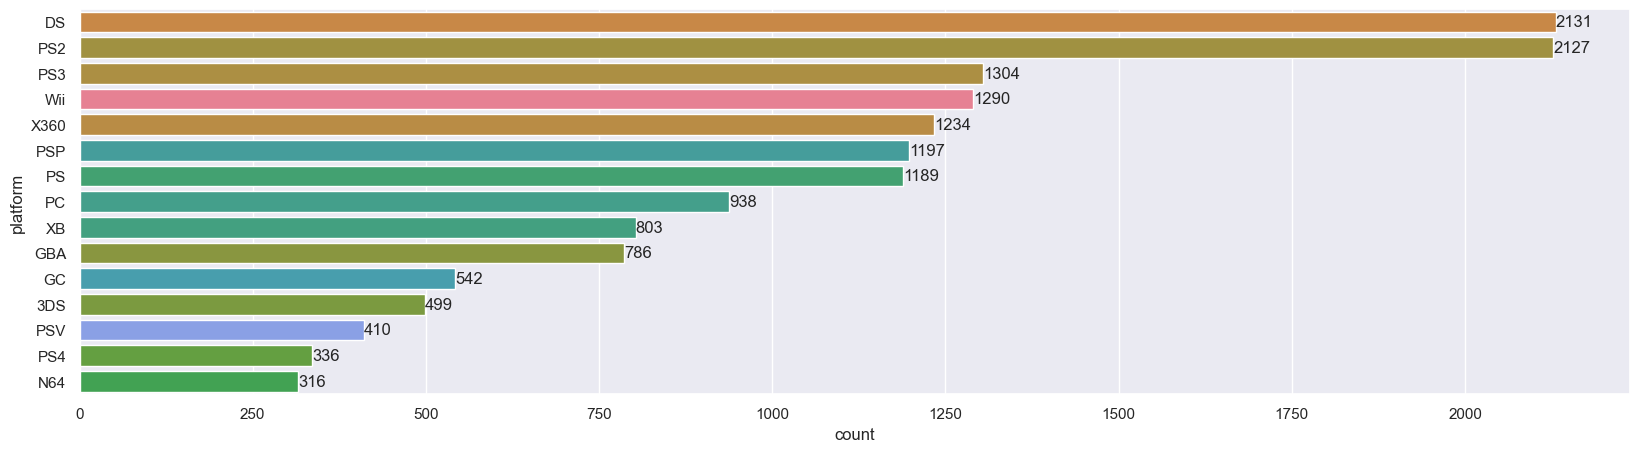

In [104]:
plot_order = df['platform'].value_counts().sort_values(ascending=False).head(15)
plot = sns.countplot(data = df, y = 'platform', order=plot_order.index, hue='platform')
for bars in plot.containers:
    plot.bar_label(bars)

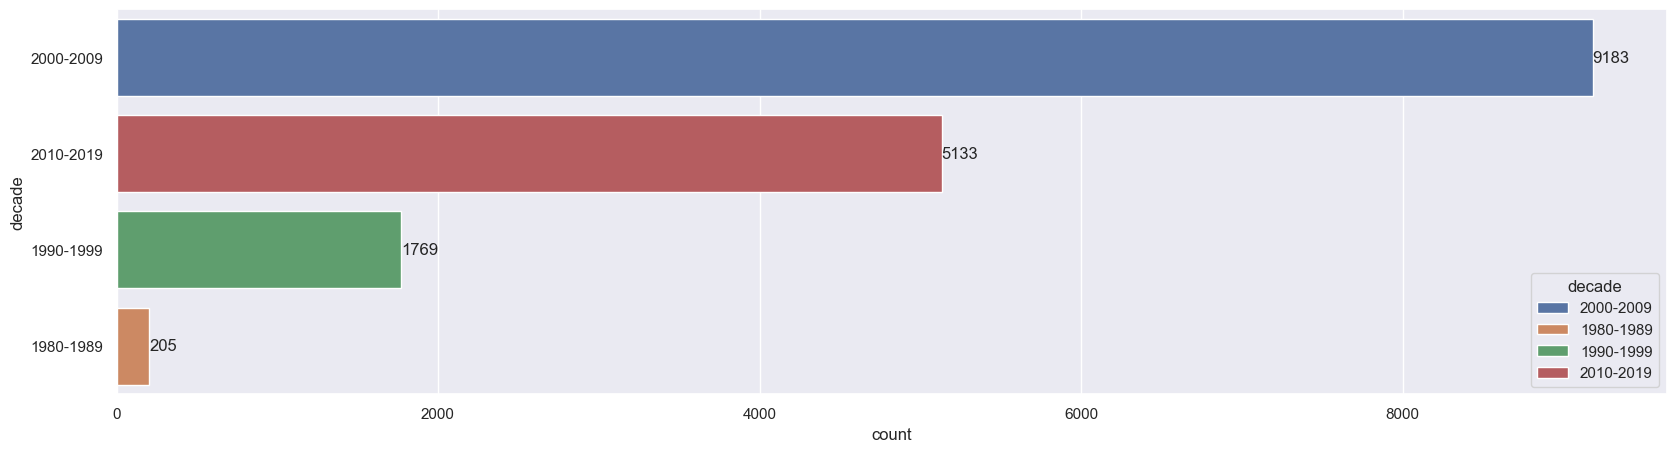

In [105]:
plot_order = df['decade'].value_counts().sort_values(ascending=False)
plot = sns.countplot(data = df, y= 'decade', order=plot_order.index, hue='decade')
for bars in plot.containers:
    plot.bar_label(bars)

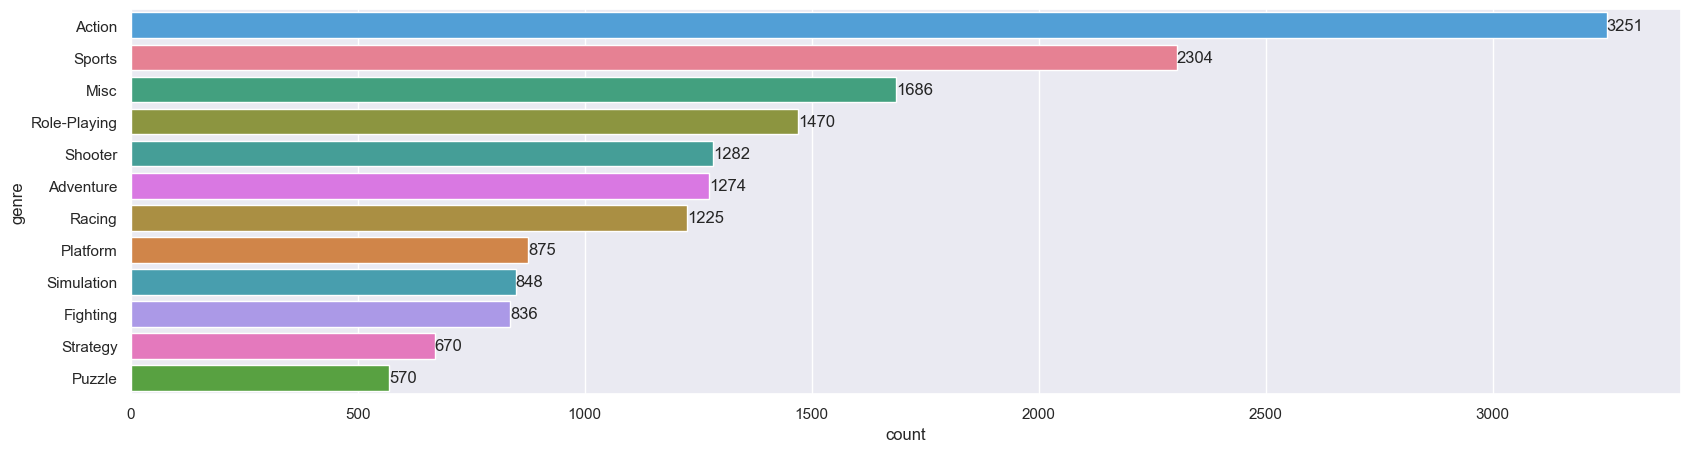

In [106]:
plot_order = df['genre'].value_counts().sort_values(ascending=False)
plot = sns.countplot(data = df, y = 'genre', order=plot_order.index, hue='genre')
for bars in plot.containers:
     plot.bar_label(bars)
     

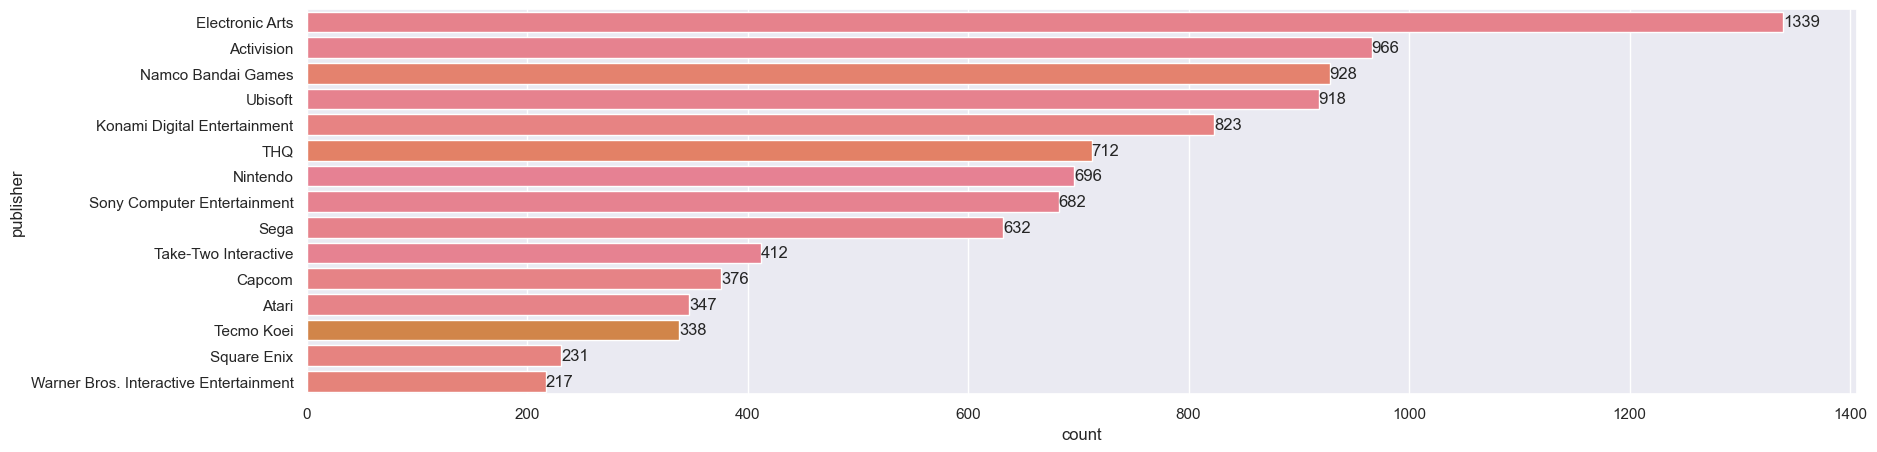

In [107]:
plot_order = df['publisher'].value_counts().sort_values(ascending=False).head(15)
plot = sns.countplot(data = df, y = 'publisher', order = plot_order.index, hue='publisher')
for bars in plot.containers:
    plot.bar_label(bars)
    

<Axes: xlabel='na_sales', ylabel='name'>

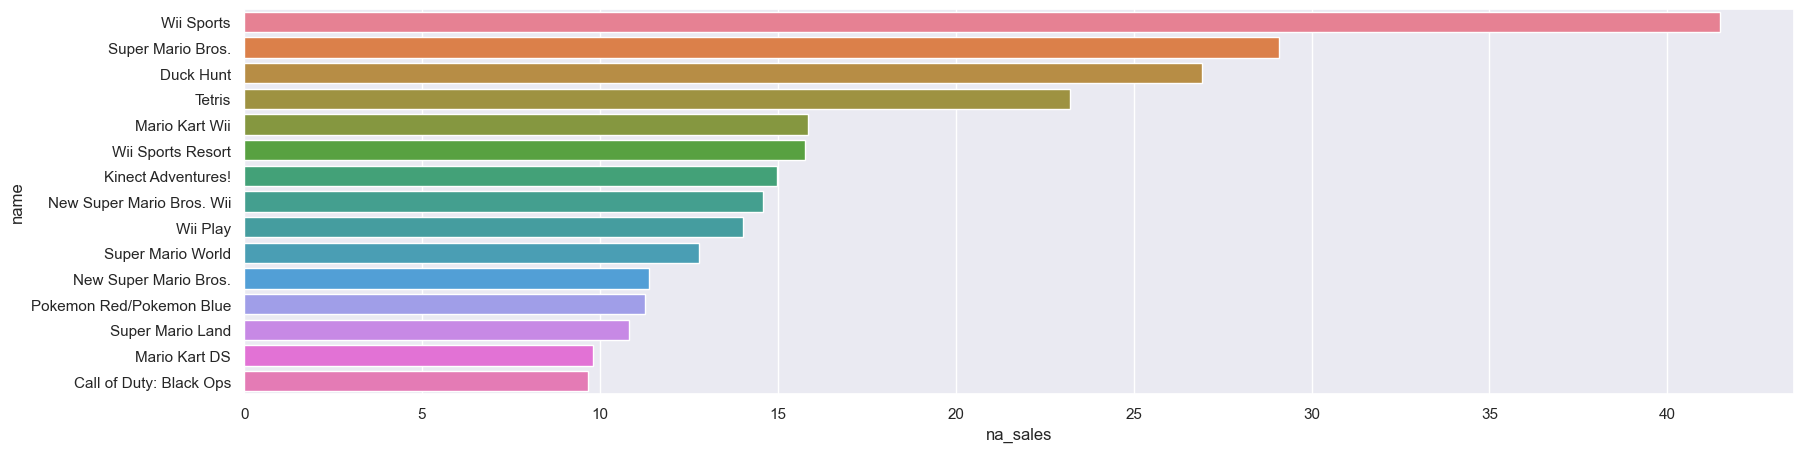

In [108]:
plot_data = df[['name','na_sales']].sort_values(by = 'na_sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'na_sales', y = 'name', hue='name')

<Axes: xlabel='eu_sales', ylabel='name'>

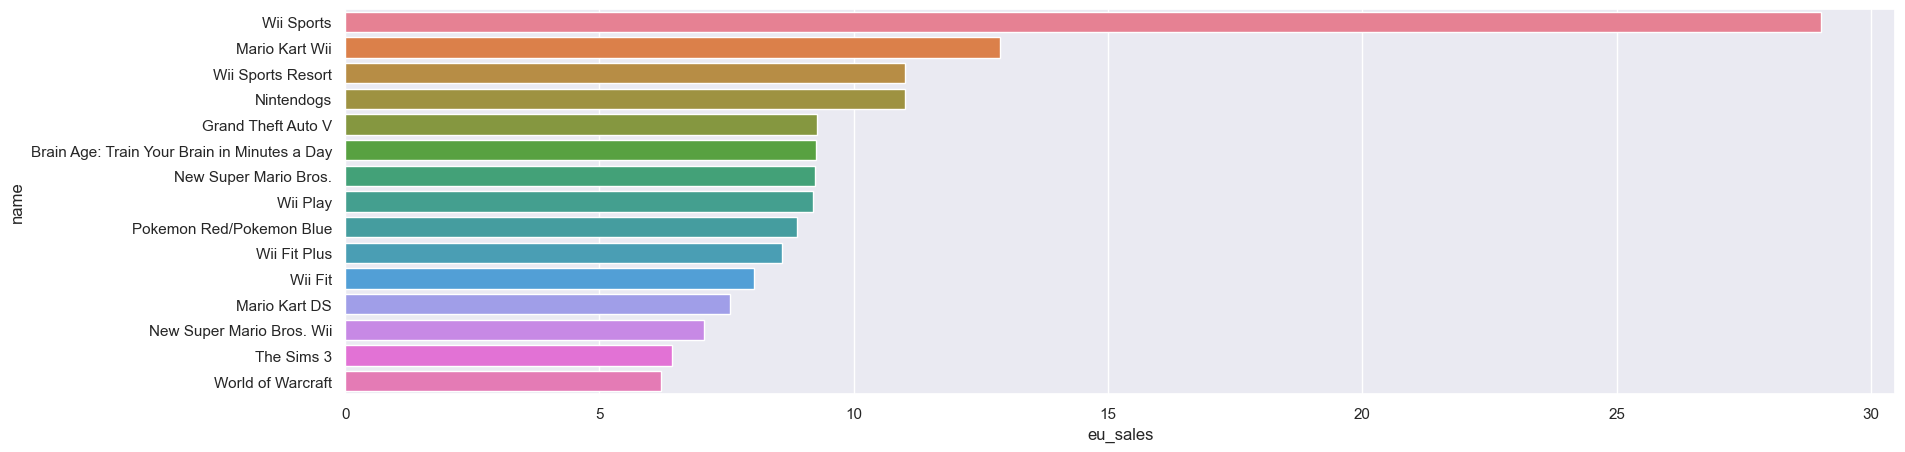

In [109]:
plot_data = df[['name','eu_sales']].sort_values(by = 'eu_sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'eu_sales', y = 'name', hue='name')

<Axes: xlabel='jp_sales', ylabel='name'>

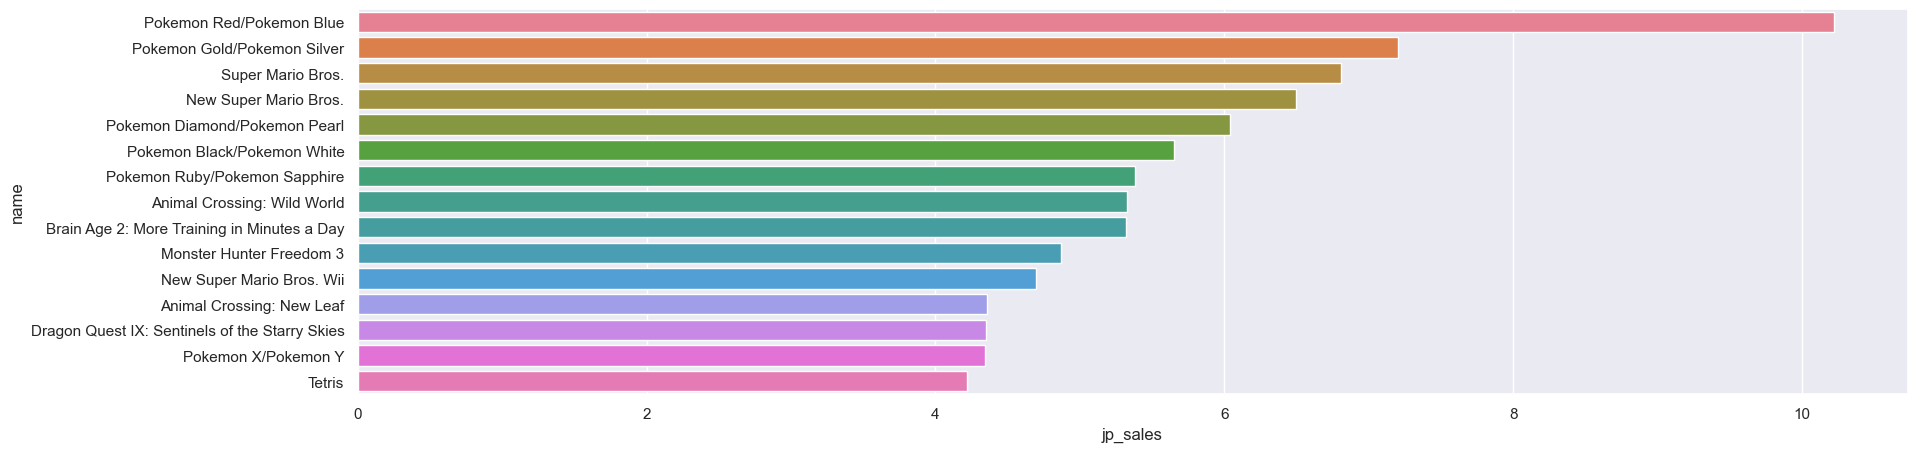

In [110]:
plot_data = df[['name','jp_sales']].sort_values(by = 'jp_sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'jp_sales', y = 'name', hue='name')


<Axes: xlabel='other_sales', ylabel='name'>

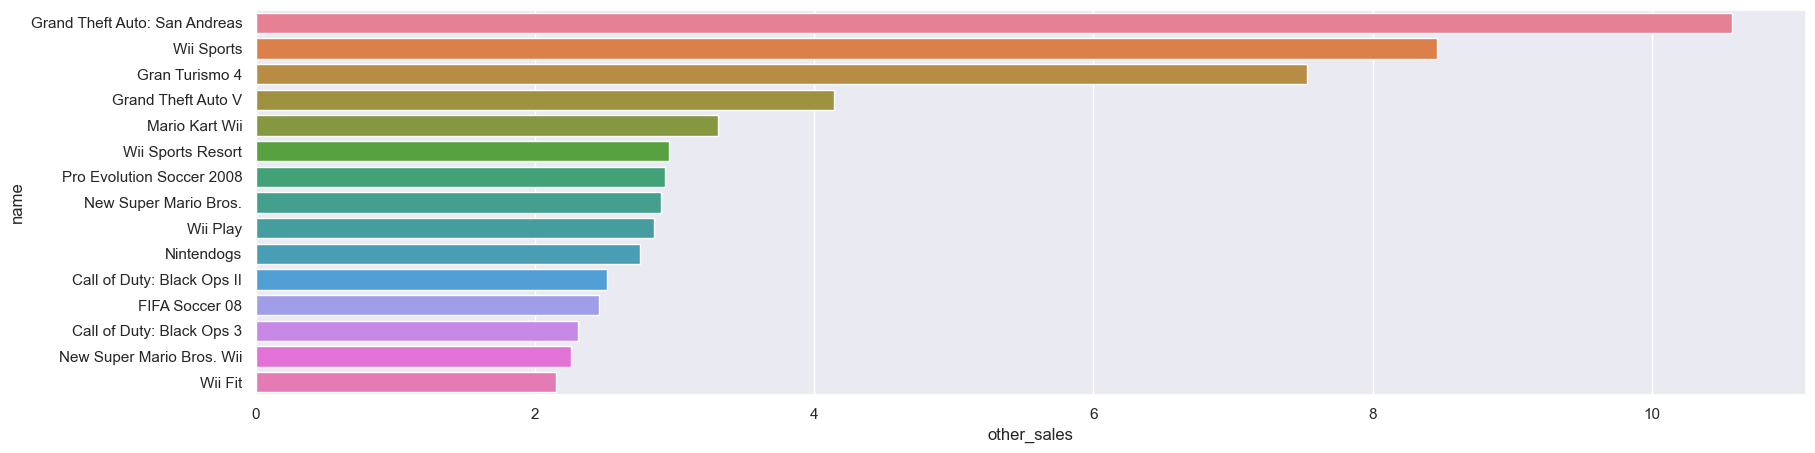

In [111]:
plot_data = df[['name','other_sales']].sort_values(by = 'other_sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'other_sales', y = 'name', hue='name')


<Axes: xlabel='global_sales', ylabel='name'>

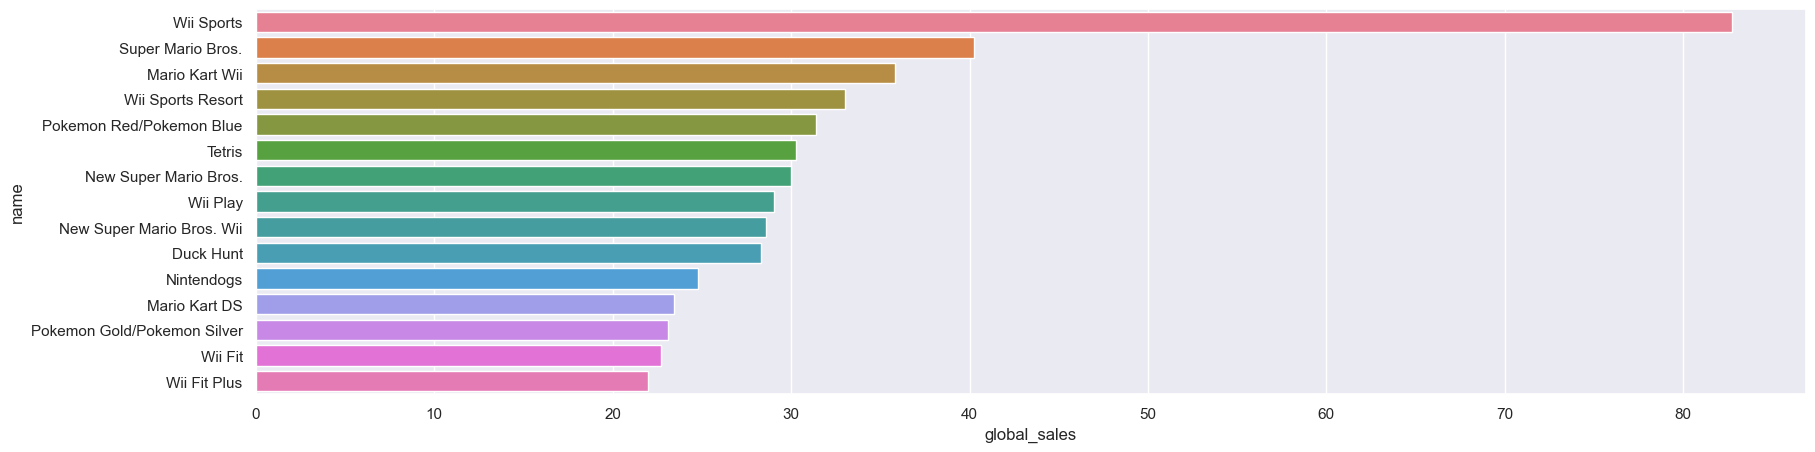

In [112]:
plot_data = df[['name','global_sales']].sort_values(by = 'global_sales', ascending=False)
plot_data.head(15)
sns.barplot(data = plot_data.head(15), x= 'global_sales', y = 'name', hue='name')


<Axes: xlabel='na_sales', ylabel='platform'>

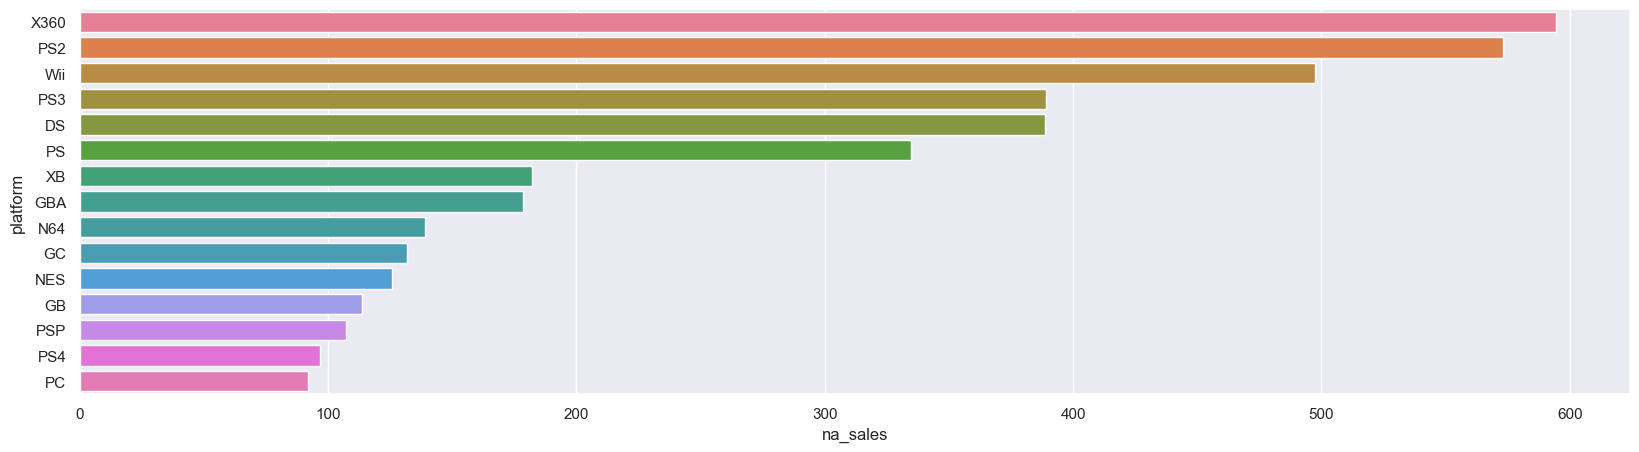

In [113]:
plot_data = df.groupby(['platform'], as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'na_sales', y = 'platform', hue='platform')

<Axes: xlabel='eu_sales', ylabel='platform'>

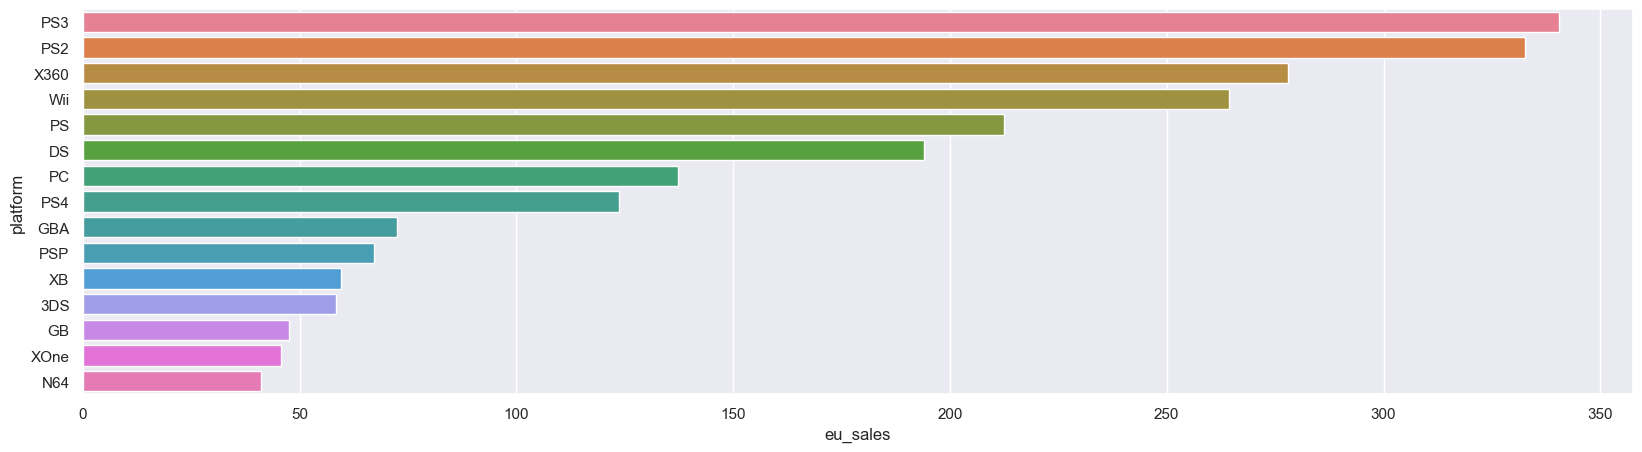

In [114]:
plot_data = df.groupby(['platform'], as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'eu_sales', y = 'platform', hue='platform')



<Axes: xlabel='jp_sales', ylabel='platform'>

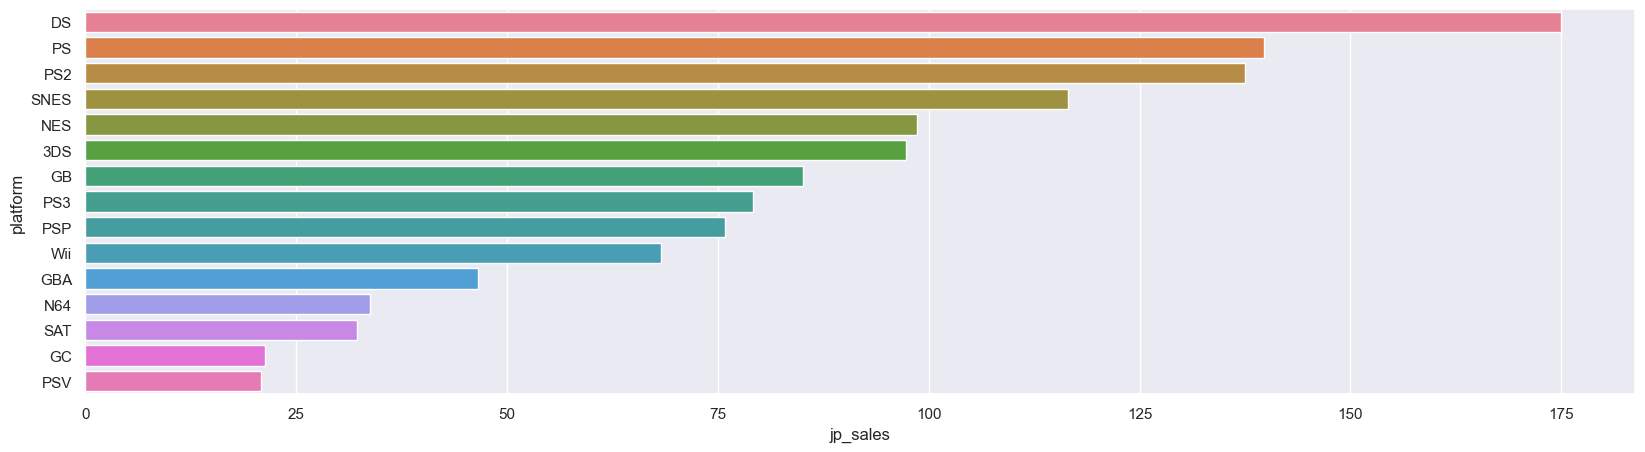

In [115]:
plot_data = df.groupby(['platform'], as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'jp_sales', y = 'platform', hue='platform')



<Axes: xlabel='other_sales', ylabel='platform'>

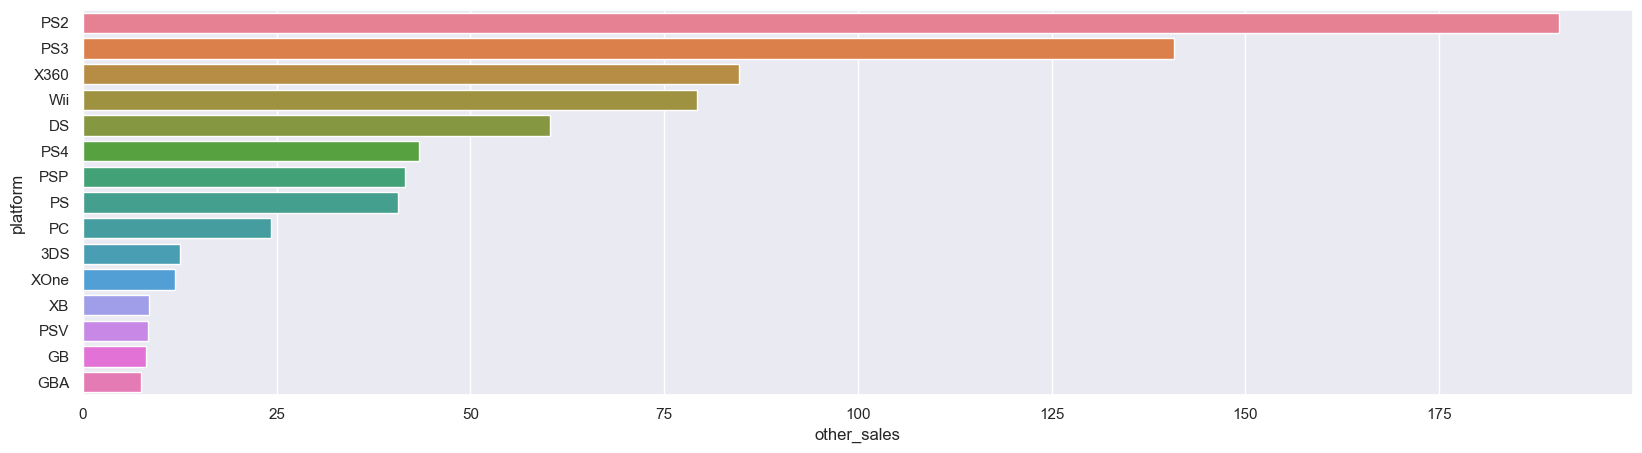

In [117]:
plot_data = df.groupby(['platform'], as_index=False)['other_sales'].sum().sort_values(by='other_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'other_sales', y = 'platform', hue='platform')



<Axes: xlabel='other_sales', ylabel='platform'>

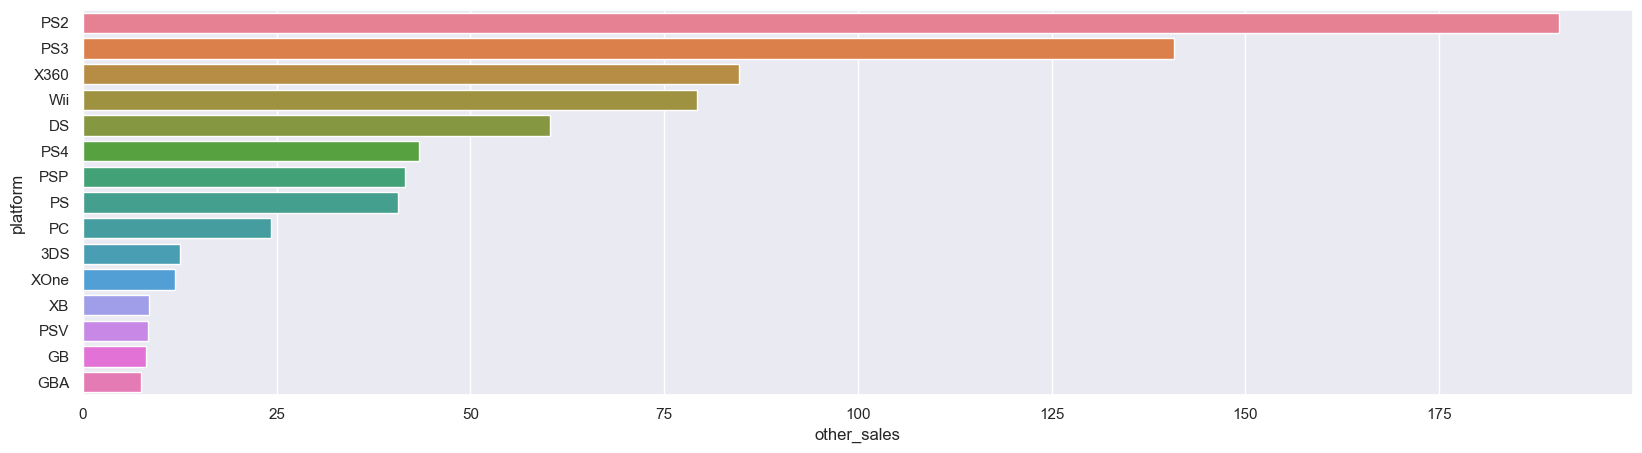

In [118]:
plot_data = df.groupby(['platform'], as_index=False)['other_sales'].sum().sort_values(by='other_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'other_sales', y = 'platform', hue='platform')



<Axes: xlabel='na_sales', ylabel='publisher'>

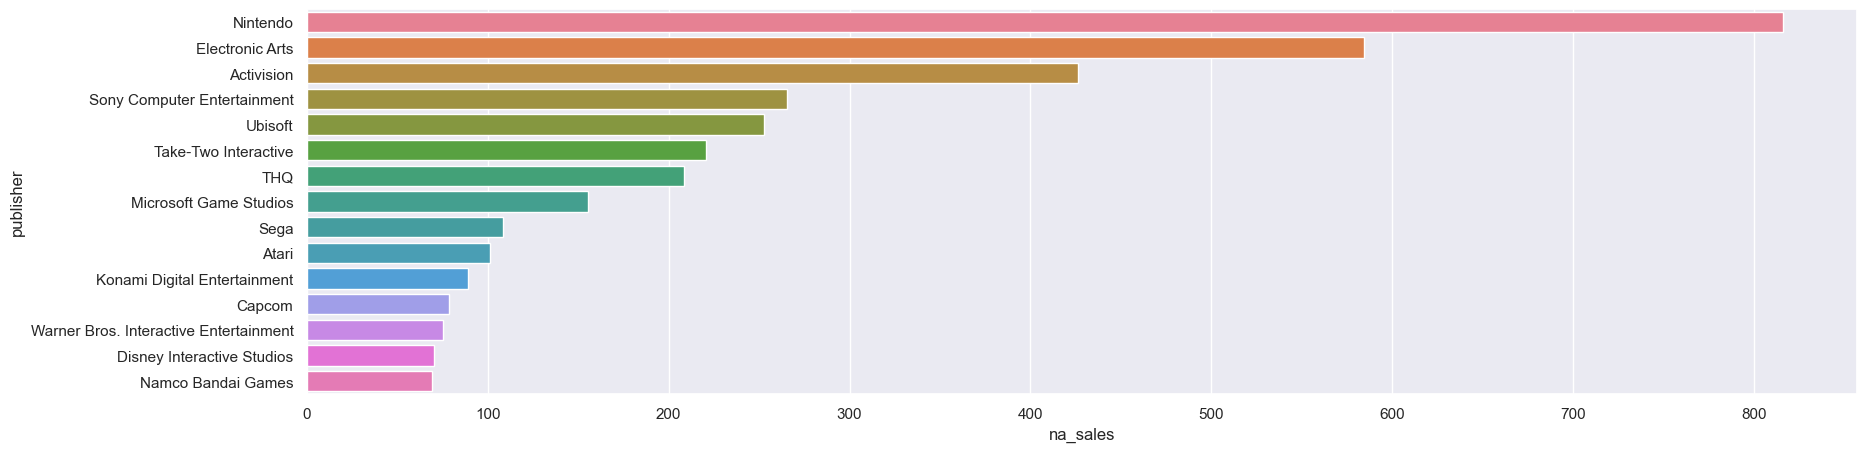

In [ ]:
plot_data = df.groupby(['publisher'], as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'na_sales', y = 'publisher', hue='publisher')



<Axes: xlabel='eu_sales', ylabel='publisher'>

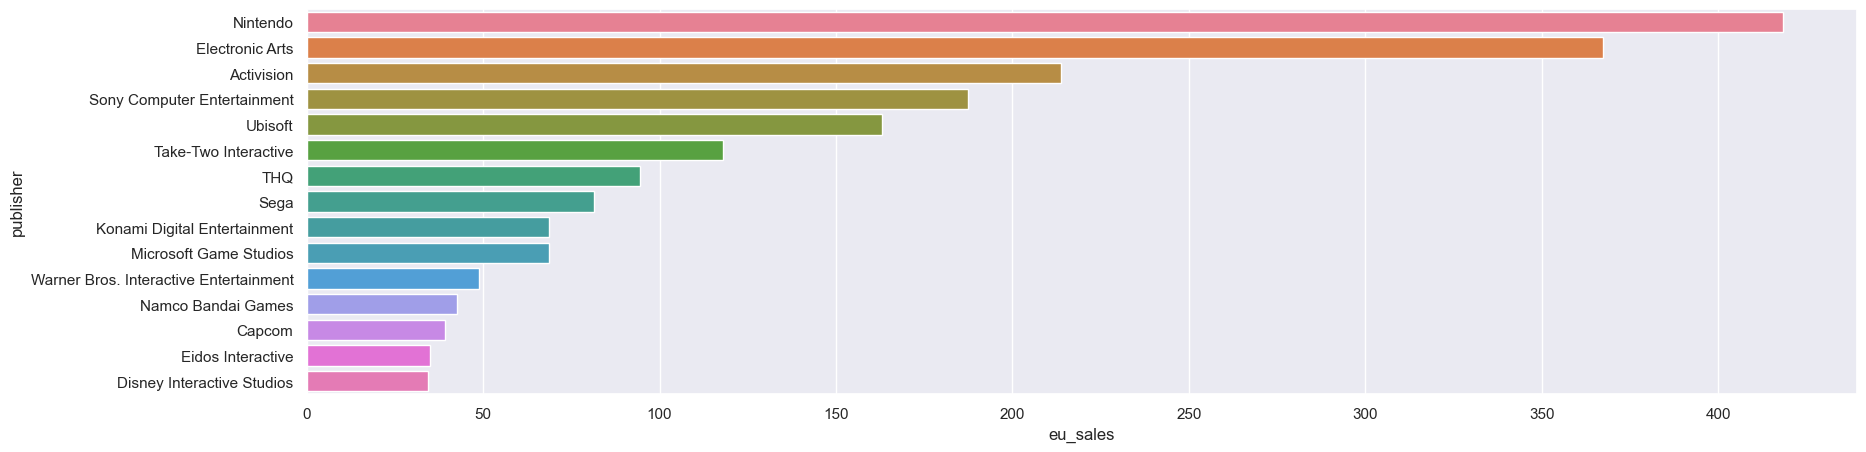

In [ ]:
plot_data = df.groupby(['publisher'], as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'eu_sales', y = 'publisher', hue='publisher')




<Axes: xlabel='jp_sales', ylabel='publisher'>

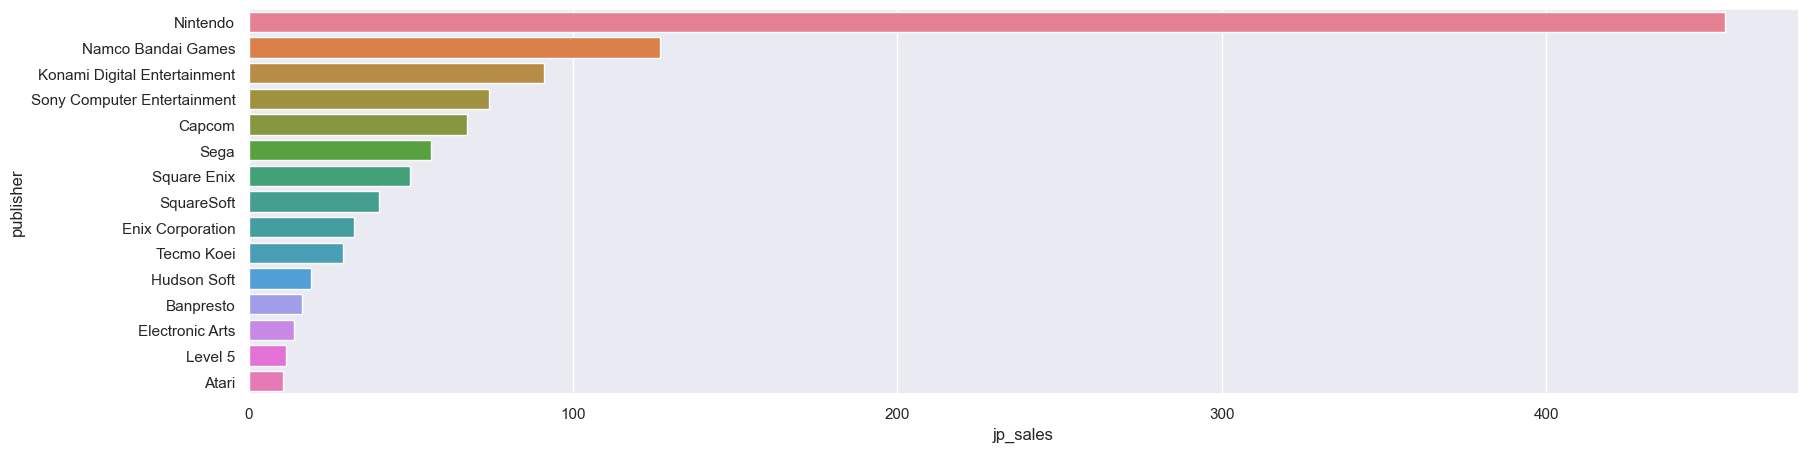

In [ ]:
plot_data = df.groupby(['publisher'], as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'jp_sales', y = 'publisher', hue='publisher')



<Axes: xlabel='other_sales', ylabel='publisher'>

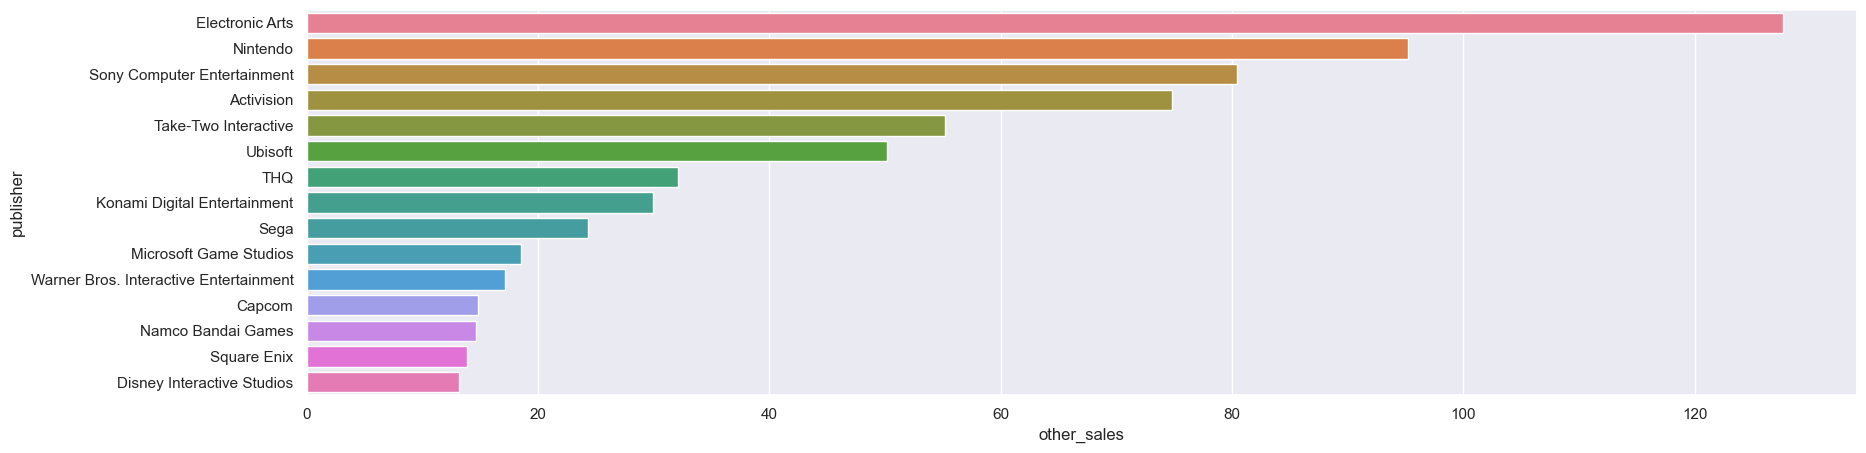

In [ ]:
plot_data = df.groupby(['publisher'], as_index=False)['other_sales'].sum().sort_values(by='other_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'other_sales', y = 'publisher', hue='publisher')




<Axes: xlabel='global_sales', ylabel='publisher'>

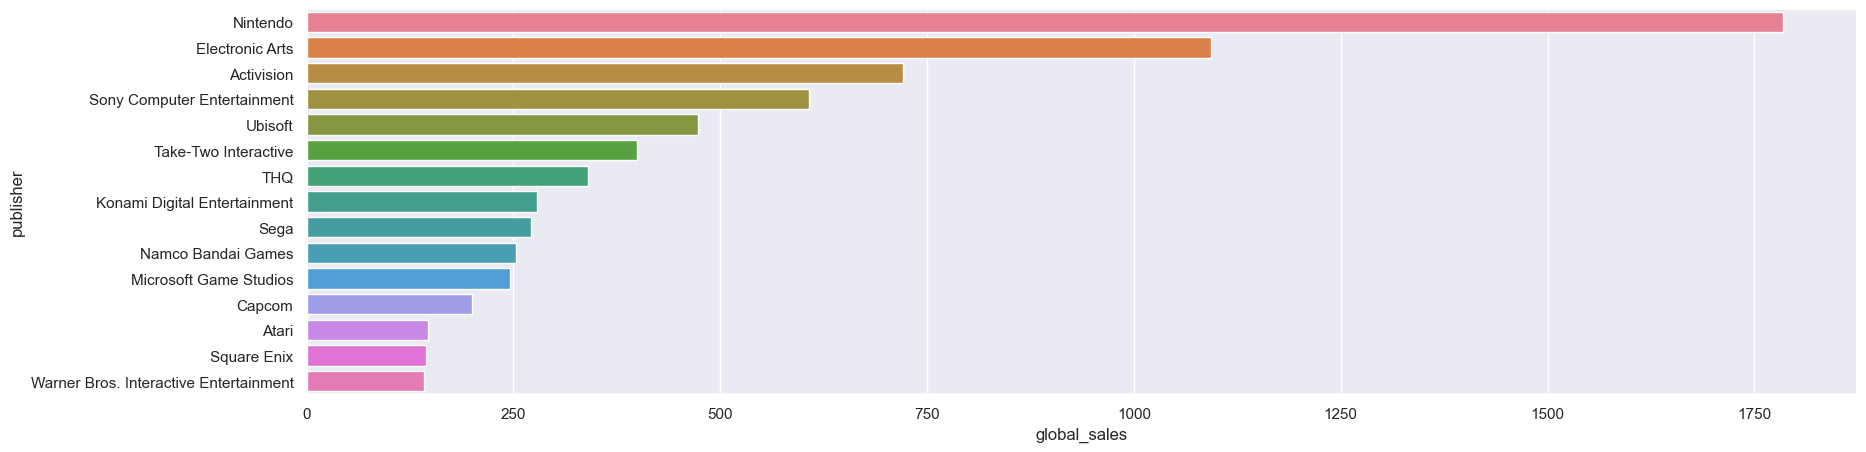

In [ ]:
plot_data = df.groupby(['publisher'], as_index=False)['global_sales'].sum().sort_values(by='global_sales', ascending=False)
plot_data
sns.barplot(data = plot_data.head(15), x = 'global_sales', y = 'publisher', hue='publisher')



<Axes: xlabel='na_sales', ylabel='genre'>

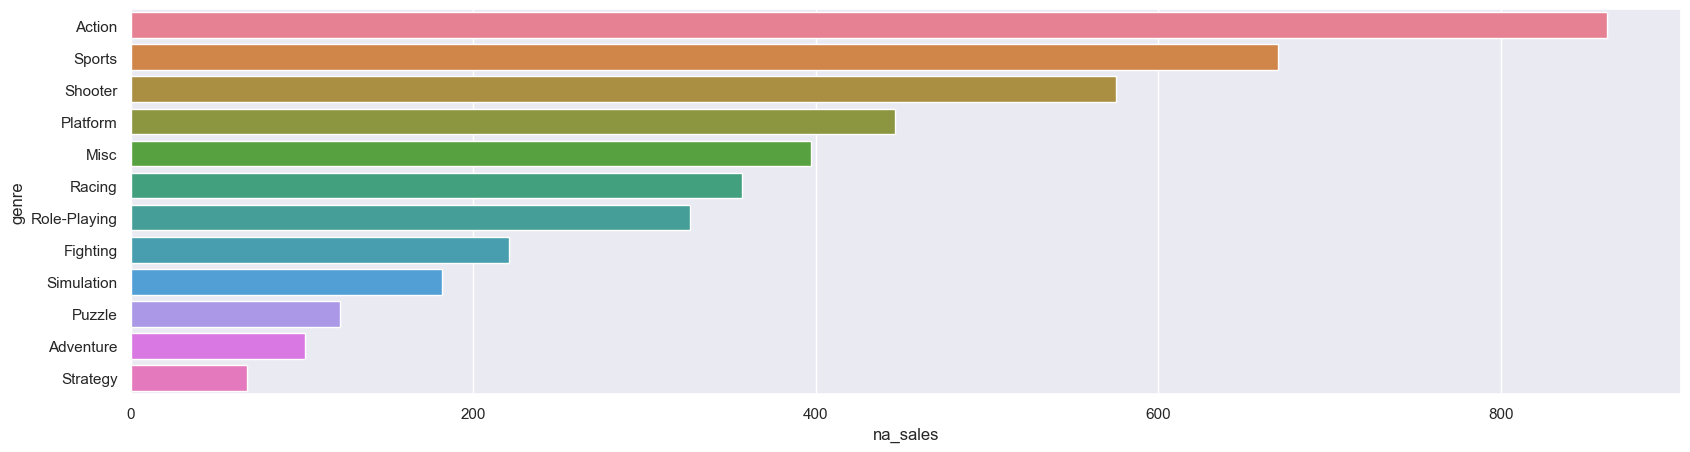

In [ ]:
plot_data = df.groupby(['genre'], as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'na_sales', y = 'genre', hue='genre')



<Axes: xlabel='eu_sales', ylabel='genre'>

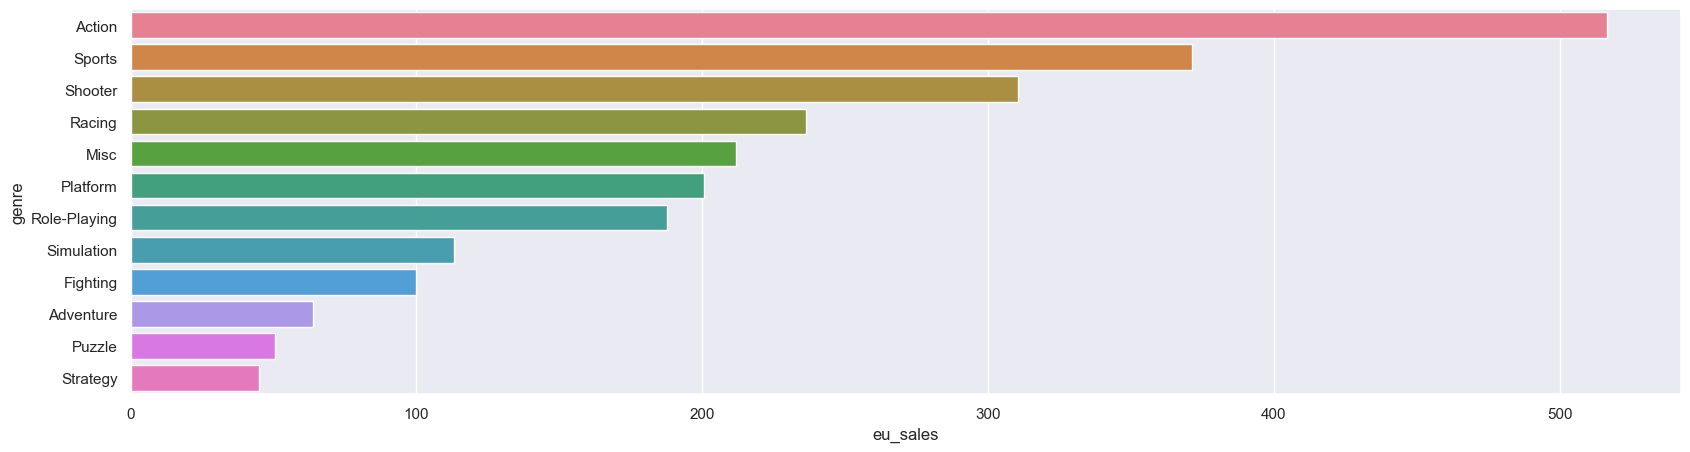

In [ ]:
plot_data = df.groupby(['genre'], as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'eu_sales', y = 'genre', hue='genre')


<Axes: xlabel='jp_sales', ylabel='genre'>

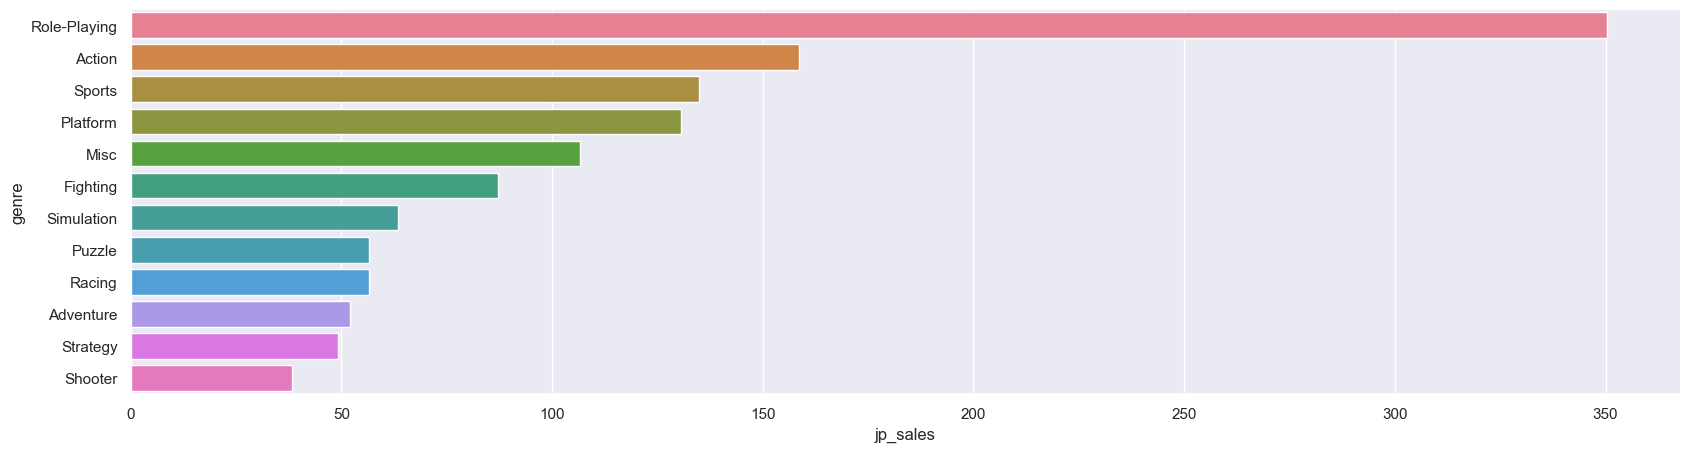

In [ ]:
plot_data = df.groupby(['genre'], as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'jp_sales', y = 'genre', hue='genre')


<Axes: xlabel='other_sales', ylabel='genre'>

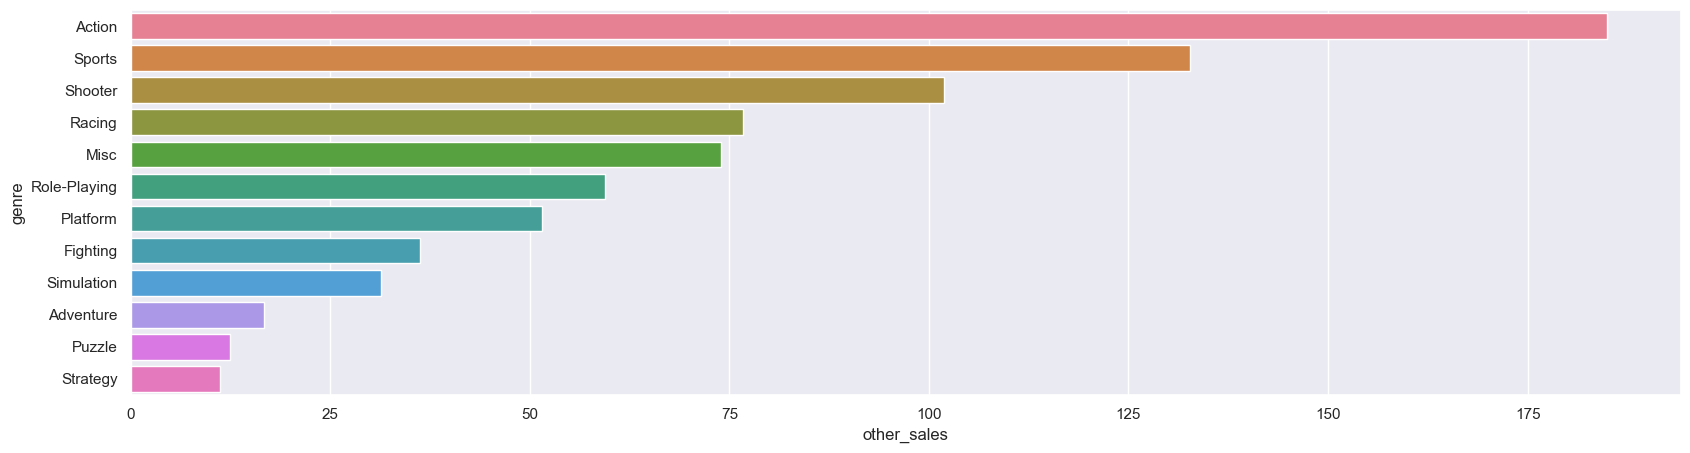

In [ ]:
plot_data = df.groupby(['genre'], as_index=False)['other_sales'].sum().sort_values(by='other_sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'other_sales', y = 'genre', hue='genre')



<Axes: xlabel='global_sales', ylabel='genre'>

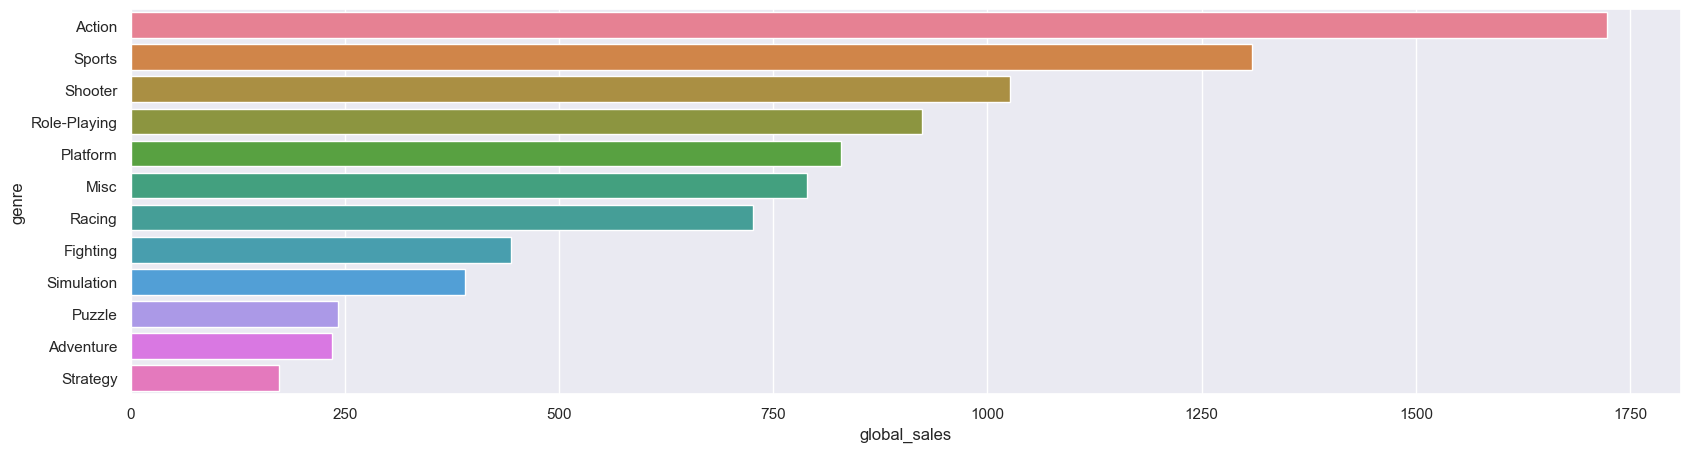

In [ ]:
plot_data = df.groupby(['genre'], as_index=False)['global_sales'].sum().sort_values(by='global_sales', ascending=False)
plot_data
sns.barplot(data = plot_data, x = 'global_sales', y = 'genre', hue='genre')

